In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

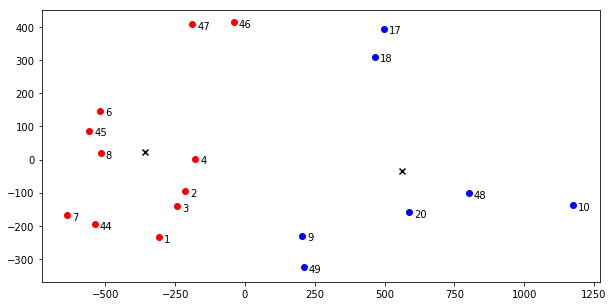

In [190]:
%matplotlib inline
m='10'
path='..\\mean_unit_sales_{}.csv'.format(m)
mth=os.path.splitext(path)[0][-2:]
df=pd.read_csv(path)
d1=df.fillna(0).drop(['family','item_nbr'], axis=1)
d2=d1.T.values
kmeans=KMeans(n_clusters=2).fit(d2)
kmeanslabel=kmeans.labels_
kmeanscenters=kmeans.cluster_centers_
stores=[]
strs=df.head().columns[2:]
ind1=np.where(kmeanslabel==1)
ind0=np.where(kmeanslabel==0)
pca=PCA(n_components=2)
d3=pca.fit_transform(d2)

d4=pca.transform(kmeanscenters)
str0=strs[ind0]
str1=strs[ind1]

str0=[1,2,3,4,6,7,8,44,45,46,47]
str1=[48,49,9,10,17,18,20]

fig, ax=plt.subplots(figsize=(10,5))

xo=list(d3[ind0][:,0])
yo=list(d3[ind0][:,1])
x1=list(d3[ind1][:,0])
y1=list(d3[ind1][:,1])

ax.scatter(xo, yo, c='r')
for i, txt in enumerate(str0):
    ax.annotate(txt, (xo[i], yo[i]), xytext=(5,-5), textcoords='offset points')
ax.scatter(x1,y1,c='b')
for i, txt in enumerate(str1):
    ax.annotate(txt, (x1[i], y1[i]), xytext=(5,-5), textcoords='offset points')


ax.scatter(d4[:,0], d4[:,1], c='k', marker='x')
fig.savefig('../results/cluster{}.png'.format(mth))
